In [3]:
import os
import numpy as np
# 读取训练集、测试集
X_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy")
X_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\Y_train.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\Y_test.npy")
ids_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy")
ids_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_train.npy")
sr_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")
sr_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy")

In [ ]:
import os
import numpy as np
import pywt  # 小波变换库
import cv2  # OpenCV 用于调整图像尺寸
from tqdm import tqdm  # 进度条库
from scipy.signal import correlate  # 用于计算自相关

# 选择小波基
wavelet = 'morl'
scales = np.arange(1, 128)  # 设定尺度范围
target_size = (128, 128)  # CNN 适配的目标尺寸

# 初始化存储矩阵 (假设所有信号长度相同)
num_samples = X_train.shape[0]
cwt_features = np.zeros((num_samples, target_size[0], target_size[1]), dtype=np.uint8)  # (样本数, 128, 128)

# 遍历所有样本并计算小波变换 (使用 tqdm 进度条)
for i, signal in enumerate(tqdm(X_train, desc="Processing CWT", unit="sample")):
    # 归一化到 [-1, 1]
    signal = signal.astype(np.float32)
    signal = signal / np.max(np.abs(signal))

    # **计算信号的自相关（从时延为0开始）**
    autocorrelation = correlate(signal, signal, mode='full')  # 自相关
    autocorrelation = autocorrelation[autocorrelation.size // 2:]  # 取正时延部分

    # **归一化自相关结果**
    autocorrelation = (autocorrelation - np.min(autocorrelation)) / (np.max(autocorrelation) - np.min(autocorrelation))  # 归一化到 [0, 1]
    autocorrelation = (autocorrelation * 2) - 1  # 归一化到 [-1, 1]

    # **进行小波变换（计算二维时频图）**
    coefficients, _ = pywt.cwt(autocorrelation, scales, wavelet)

    # 取绝对值并归一化到 [0, 255]
    cwt_image = np.abs(coefficients)
    cwt_image = (cwt_image - np.min(cwt_image)) / (np.max(cwt_image) - np.min(cwt_image))  # 归一化到 [0, 1]
    coef_img = (cwt_image * 255).astype(np.uint8)  # 转换为 uint8 格式

    # **调整尺寸到 (128×128)**
    coef_resized = cv2.resize(coef_img, target_size, interpolation=cv2.INTER_CUBIC)

    # 存入特征矩阵
    cwt_features[i] = coef_resized

# **整理成 CNN 输入格式 (num_samples, 128, 128, 1)**
cwt_features = np.expand_dims(cwt_features, axis=-1)

# 保存转换后的二维特征
output_path = r"D:\Dataset\Temp_Results\Wavelet_autocorr\X_train_cwt_autocorr.npy"
np.save(output_path, cwt_features)

print(f"✅ 小波变换完成！二维特征已保存至 {output_path}")


Processing CWT:   0%|          | 0/468 [00:00<?, ?sample/s]

Processing CWT: 100%|██████████| 468/468 [02:58<00:00,  2.63sample/s]


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Dataset\\Temp_Results\\Wavelet_autocorr\\X_train_cwt_abs.npy'

In [ ]:
import os
import numpy as np
import pywt  # 小波变换库
import cv2  # OpenCV 用于调整图像尺寸
from tqdm import tqdm  # 进度条库
from scipy.signal import correlate  # 用于计算自相关

# 选择小波基
wavelet = 'morl'
scales = np.arange(1, 128)  # 设定尺度范围
target_size = (128, 128)  # CNN 适配的目标尺寸

# 初始化存储矩阵 (假设所有信号长度相同)
num_samples = X_test.shape[0]
cwt_features = np.zeros((num_samples, target_size[0], target_size[1]), dtype=np.uint8)  # (样本数, 128, 128)

# 遍历所有样本并计算小波变换 (使用 tqdm 进度条)
for i, signal in enumerate(tqdm(X_test, desc="Processing CWT", unit="sample")):
    # 归一化到 [-1, 1]
    signal = signal.astype(np.float32)
    signal = signal / np.max(np.abs(signal))

    # **计算信号的自相关（从时延为0开始）**
    autocorrelation = correlate(signal, signal, mode='full')  # 自相关
    autocorrelation = autocorrelation[autocorrelation.size // 2:]  # 取正时延部分

    # **归一化自相关结果**
    autocorrelation = (autocorrelation - np.min(autocorrelation)) / (np.max(autocorrelation) - np.min(autocorrelation))  # 归一化到 [0, 1]
    autocorrelation = (autocorrelation * 2) - 1  # 归一化到 [-1, 1]

    # **进行小波变换（计算二维时频图）**
    coefficients, _ = pywt.cwt(autocorrelation, scales, wavelet)

    # 取绝对值并归一化到 [0, 255]
    cwt_image = np.abs(coefficients)
    cwt_image = (cwt_image - np.min(cwt_image)) / (np.max(cwt_image) - np.min(cwt_image))  # 归一化到 [0, 1]
    coef_img = (cwt_image * 255).astype(np.uint8)  # 转换为 uint8 格式

    # **调整尺寸到 (128×128)**
    coef_resized = cv2.resize(coef_img, target_size, interpolation=cv2.INTER_CUBIC)

    # 存入特征矩阵
    cwt_features[i] = coef_resized

# **整理成 CNN 输入格式 (num_samples, 128, 128, 1)**
cwt_features = np.expand_dims(cwt_features, axis=-1)

# 保存转换后的二维特征
output_path = r"D:\Dataset\Temp_Results\Wavelet_autocorr\X_test_cwt_autocorr.npy"
np.save(output_path, cwt_features)

print(f"✅ 小波变换完成！二维特征已保存至 {output_path}")


Processing CWT: 100%|██████████| 117/117 [00:51<00:00,  2.28sample/s]

✅ 小波变换完成！二维特征已保存至 D:\Dataset\Temp_Results\Wavelet_autocorr\X_test_cwt_autocorr.npy.npy


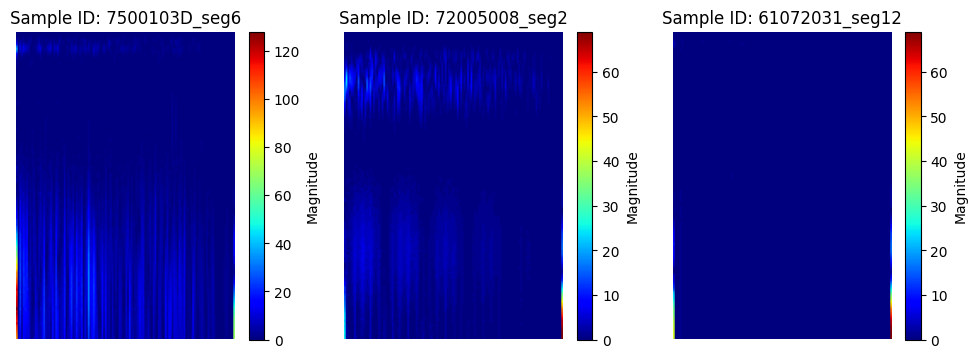

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import Audio  # 用于音频播放
sr_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")
sr_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy")
# 假设 sr_train 存储训练数据的采样率信息
# 随机选择 3 个样本索引
num_samples = X_train.shape[0]
random_indices = random.sample(range(num_samples), 3)
cwt_features = np.load(r"D:\Dataset\Temp_Results\Wavelet_autocorr\X_train_cwt_autocorr.npy.")

# **绘制随机选择的 3 张小波变换图像并播放音频**
plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cwt_features[idx], cmap='jet', aspect='auto')
    plt.colorbar(label="Magnitude")
    
    # 获取样本的 ID
    sample_id = ids_train[idx]  # 获取该样本的 ID（从 ids_train 中获取）
    
    # 获取音频信号和采样率
    signal = X_train[idx]  # 获取该样本的信号数据
    sample_sr = sr_train[idx]  # 获取该样本的采样率（从 sr_train 中获取）

    # 显示该样本的 ID
    plt.title(f"Sample ID: {sample_id}")
    plt.axis("off")  # 关闭坐标轴

    # 播放音频信号（假设 X_train 包含音频信号数据）
    display(Audio(signal, rate=sample_sr))  # `sample_sr` 是对应的采样率

plt.show()
